# "Predict Future Sales" Kaggle competition
"You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge."

## File descriptions
sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.

sample_submission.csv - a sample submission file in the correct format.

items.csv - supplemental information about the items/products.

item_categories.csv  - supplemental information about the items categories.

shops.csv- supplemental information about the shops.

## Data fields
ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = pd.read_csv('sales_train_v2.csv')
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
type(sales['date'][0])

str

In [59]:
sales[sales['date_block_num'] == 33]['date'].max()

'31.10.2015'

In [6]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [7]:
len(sales['shop_id'].value_counts())

60

In [8]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [10]:
shops['shop_name'].value_counts()

РостовНаДону ТРК "Мегацентр Горизонт" Островной    1
Москва ТРК "Атриум"                                1
Новосибирск ТЦ "Мега"                              1
Москва ТЦ "Ареал" (Беляево)                        1
Волжский ТЦ "Волга Молл"                           1
Москва ТЦ "МЕГА Белая Дача II"                     1
Москва Магазин С21                                 1
РостовНаДону ТРК "Мегацентр Горизонт"              1
Москва ТЦ "Серебряный Дом"                         1
Сергиев Посад ТЦ "7Я"                              1
Курск ТЦ "Пушкинский"                              1
Балашиха ТРК "Октябрь-Киномир"                     1
Казань ТЦ "Бехетле"                                1
Москва ТК "Буденовский" (пав.К7)                   1
Москва ТЦ "Новый век" (Новокосино)                 1
Уфа ТК "Центральный"                               1
!Якутск Орджоникидзе, 56 фран                      1
Интернет-магазин ЧС                                1
СПб ТК "Сенная"                               

In [11]:
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [113]:
items.tail()

,item_name,item_id,item_category_id
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [13]:
items['item_category_id'].value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
30     756
72     666
19     628
61     598
23     501
43     471
57     427
56     397
67     394
63     366
76     333
41     332
69     317
38     310
62     295
59     294
64     290
78     278
75     277
28     240
70     228
77     220
45     195
66     178
20     175
      ... 
4       15
83      15
42      12
9       12
46      12
8        9
82       8
34       8
27       8
74       8
17       7
81       7
39       7
71       6
36       6
32       6
80       6
18       6
13       6
48       5
0        4
35       4
52       3
53       3
26       3
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, Length: 84, dtype: int64

In [14]:
i_cats = pd.read_csv('item_categories.csv')
i_cats.head(20)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [15]:
i_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [16]:
list(i_cats['item_category_name'])

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

In [17]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [19]:
test['item_id'].value_counts()

2047     42
19744    42
15406    42
13359    42
3240     42
1193     42
7338     42
11436    42
9389     42
21795    42
13231    42
13743    42
3624     42
1577     42
7722     42
5675     42
11948    42
16046    42
19488    42
15278    42
10029    42
4395     42
18464    42
2088     42
6186     42
8237     42
20643    42
8365     42
12463    42
12591    42
         ..
1492     42
11985    42
8528     42
16083    42
3797     42
7895     42
18140    42
20189    42
10064    42
16211    42
7255     42
13394    42
11345    42
13266    42
20830    42
8656     42
14803    42
6615     42
20958    42
12882    42
14931    42
4694     42
6743     42
16988    42
19037    42
21086    42
21214    42
17244    42
21342    42
2049     42
Name: item_id, Length: 5100, dtype: int64

In [20]:
test['shop_id'].value_counts()

59    5100
16    5100
28    5100
26    5100
25    5100
24    5100
22    5100
21    5100
19    5100
18    5100
15    5100
58    5100
14    5100
12    5100
10    5100
7     5100
6     5100
5     5100
4     5100
3     5100
31    5100
34    5100
35    5100
36    5100
57    5100
56    5100
55    5100
53    5100
52    5100
50    5100
49    5100
48    5100
47    5100
46    5100
45    5100
44    5100
42    5100
41    5100
39    5100
38    5100
37    5100
2     5100
Name: shop_id, dtype: int64

In [21]:
test['shop_id'].value_counts().shape

(42,)

In [22]:
sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [26]:
monthly = sales.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_cnt_day': 'sum', 'item_price': 'mean'})
monthly.rename(mapper={'item_cnt_day': 'item_cnt_month', 'item_price': 'mean_price'}, inplace=True, axis=1)
monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,mean_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [29]:
monthly.describe()

,date_block_num,shop_id,item_id,item_cnt_month,mean_price
count,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
mean,1.466479e+01,3.280585e+01,1.068099e+04,2.267200e+00,7.908847e+02
std,9.542322e+00,1.653701e+01,6.238883e+03,8.649882e+00,1.551605e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02
25%,6.000000e+00,2.100000e+01,5.045000e+03,1.000000e+00,1.990000e+02
50%,1.400000e+01,3.100000e+01,1.049700e+04,1.000000e+00,3.990000e+02
75%,2.300000e+01,4.700000e+01,1.606000e+04,2.000000e+00,8.985000e+02
max,3.300000e+01,5.900000e+01,2.216900e+04,2.253000e+03,3.079800e+05


In [27]:
monthly['item_cnt_month'].value_counts()

 1.0       1058825
 2.0        265502
 3.0        103227
 4.0         53327
 5.0         31974
 6.0         20731
 7.0         14060
 8.0         10430
 9.0          7540
 10.0         6013
 11.0         4483
 12.0         3714
 13.0         3051
 0.0          2583
 14.0         2448
 15.0         2076
 16.0         1750
 17.0         1577
 18.0         1297
 19.0         1109
 20.0         1029
-1.0           883
 21.0          832
 22.0          719
 23.0          668
 24.0          538
 25.0          524
 26.0          475
 27.0          428
 28.0          408
            ...   
 978.0           1
 421.0           1
 422.0           1
 950.0           1
 423.0           1
 378.0           1
 375.0           1
 432.0           1
 360.0           1
 334.0           1
 337.0           1
 339.0           1
 341.0           1
 229.0           1
 349.0           1
 353.0           1
 359.0           1
 528.0           1
 1305.0          1
 374.0           1
-5.0             1
 365.0      

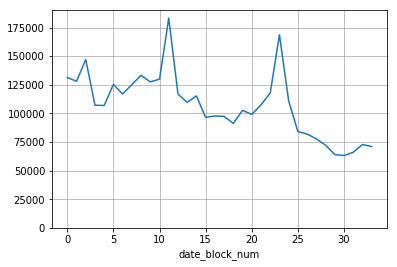

In [41]:
monthly.groupby('date_block_num')['item_cnt_month'].agg('sum').plot(grid=True, ylim=[0, 190000]);

In [30]:
monthly[monthly['item_cnt_month'] == 2253]

,date_block_num,shop_id,item_id,item_cnt_month,mean_price
1582127,33,12,11373,2253.0,382.224936


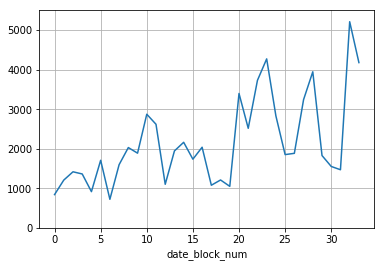

In [42]:
monthly[monthly['shop_id'] == 12].groupby('date_block_num')['item_cnt_month'].agg('sum').plot(grid=True, ylim=[0, 5500]);

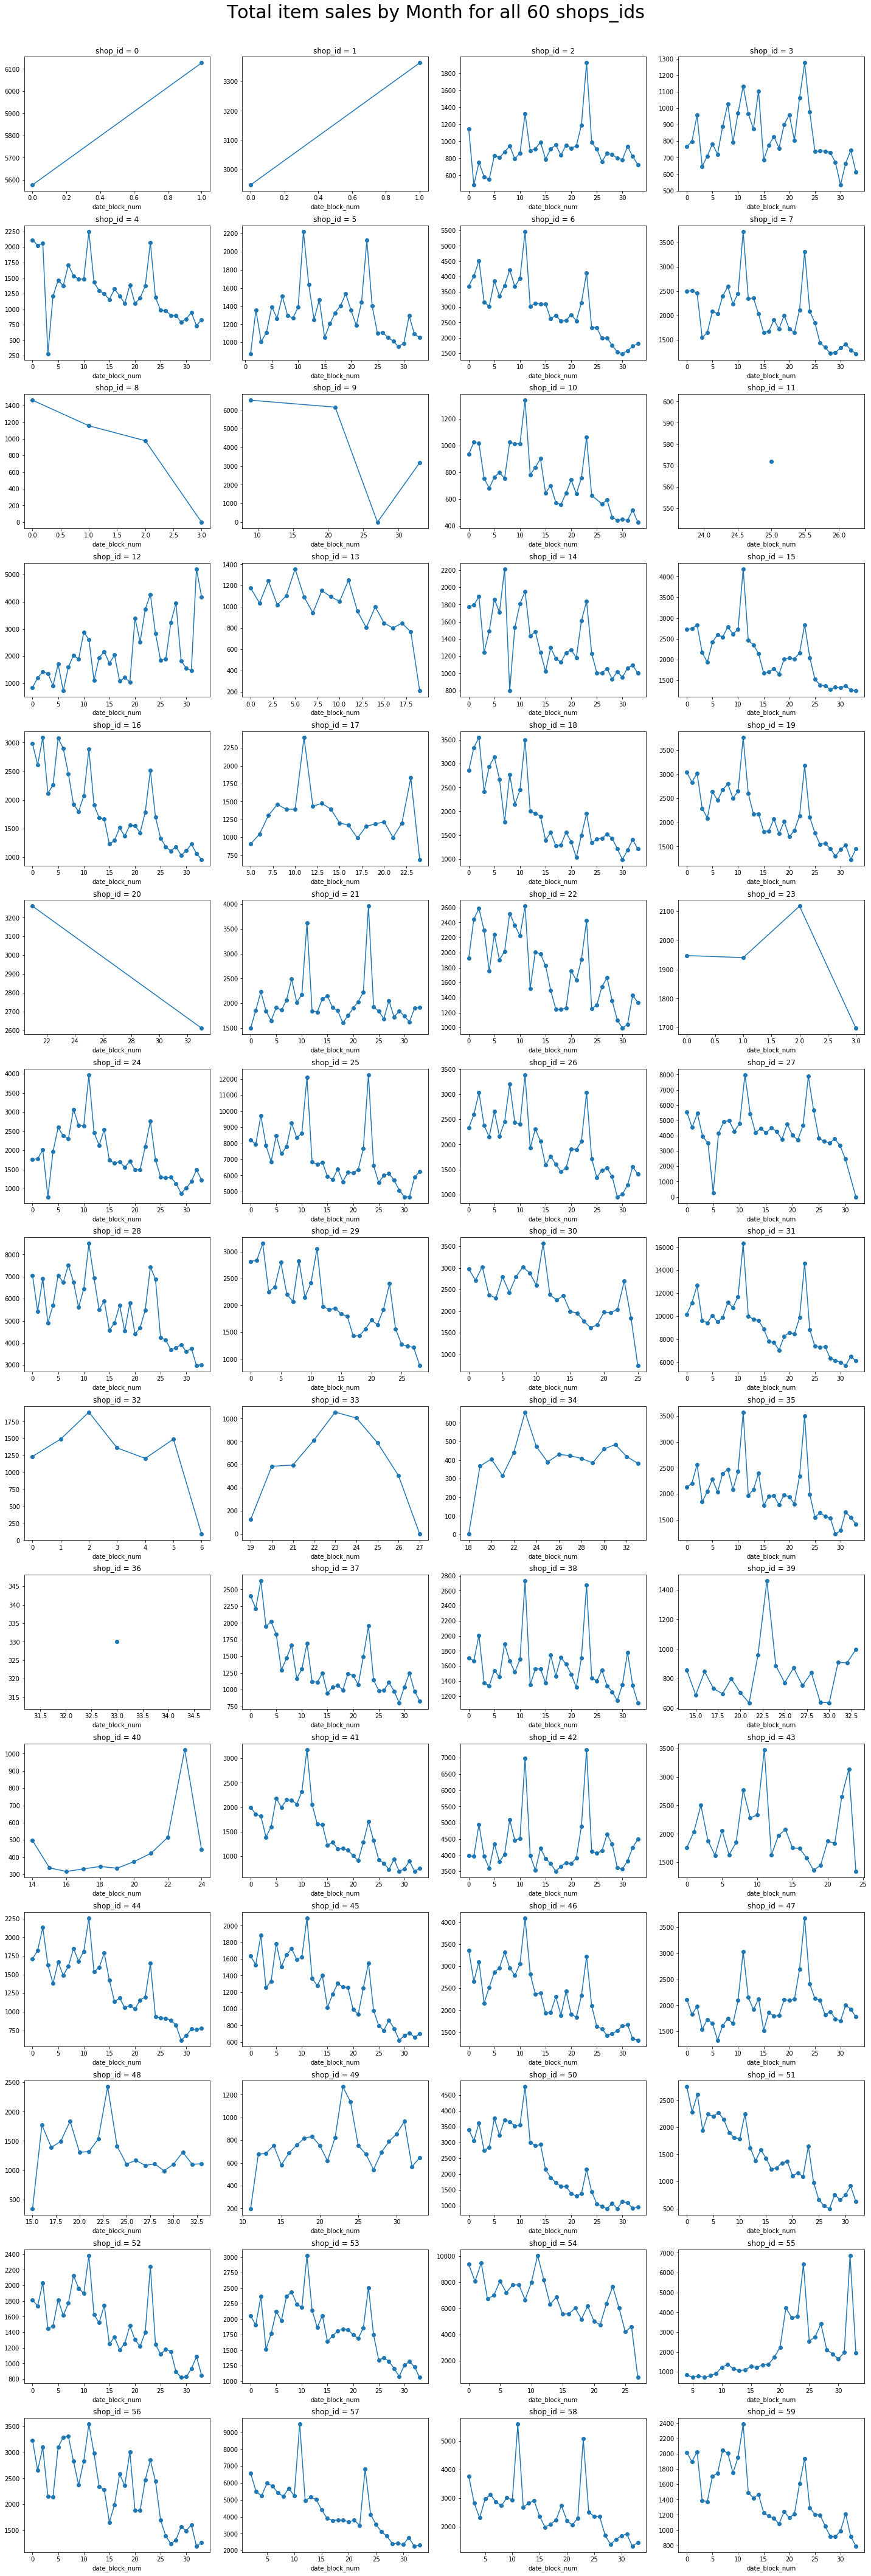

In [95]:
plt.figure(figsize=(20, 60))
for i in range(0, 60):
    plt.subplot(15, 4, i + 1)
    plt.title('shop_id = {}'.format(i))
    monthly[monthly['shop_id'] == i].groupby('date_block_num')['item_cnt_month'].agg('sum').plot(style=['-o']);
plt.tight_layout()
plt.suptitle('Total item sales by Month for all 60 shops_ids', size=30)
plt.subplots_adjust(top=0.96)
plt.show()

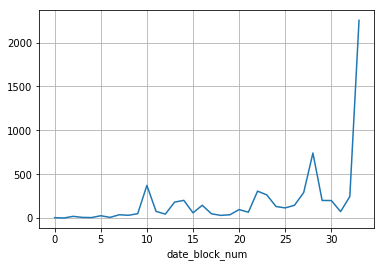

In [43]:
monthly[monthly['item_id'] == 11373].groupby('date_block_num')['item_cnt_month'].agg('sum').plot(grid=True);

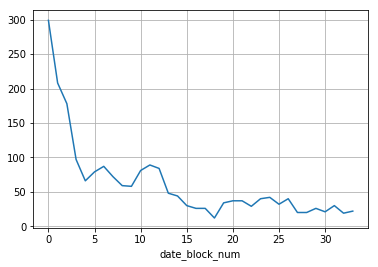

In [48]:
monthly[monthly['item_id'] == 32].groupby('date_block_num')['item_cnt_month'].agg('sum').plot(grid=True);

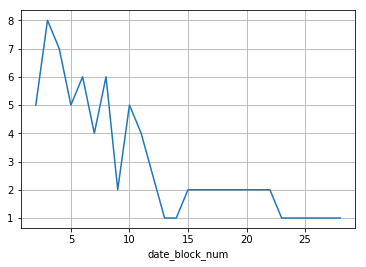

In [49]:
monthly[monthly['item_id'] == 100].groupby('date_block_num')['item_cnt_month'].agg('sum').plot(grid=True);

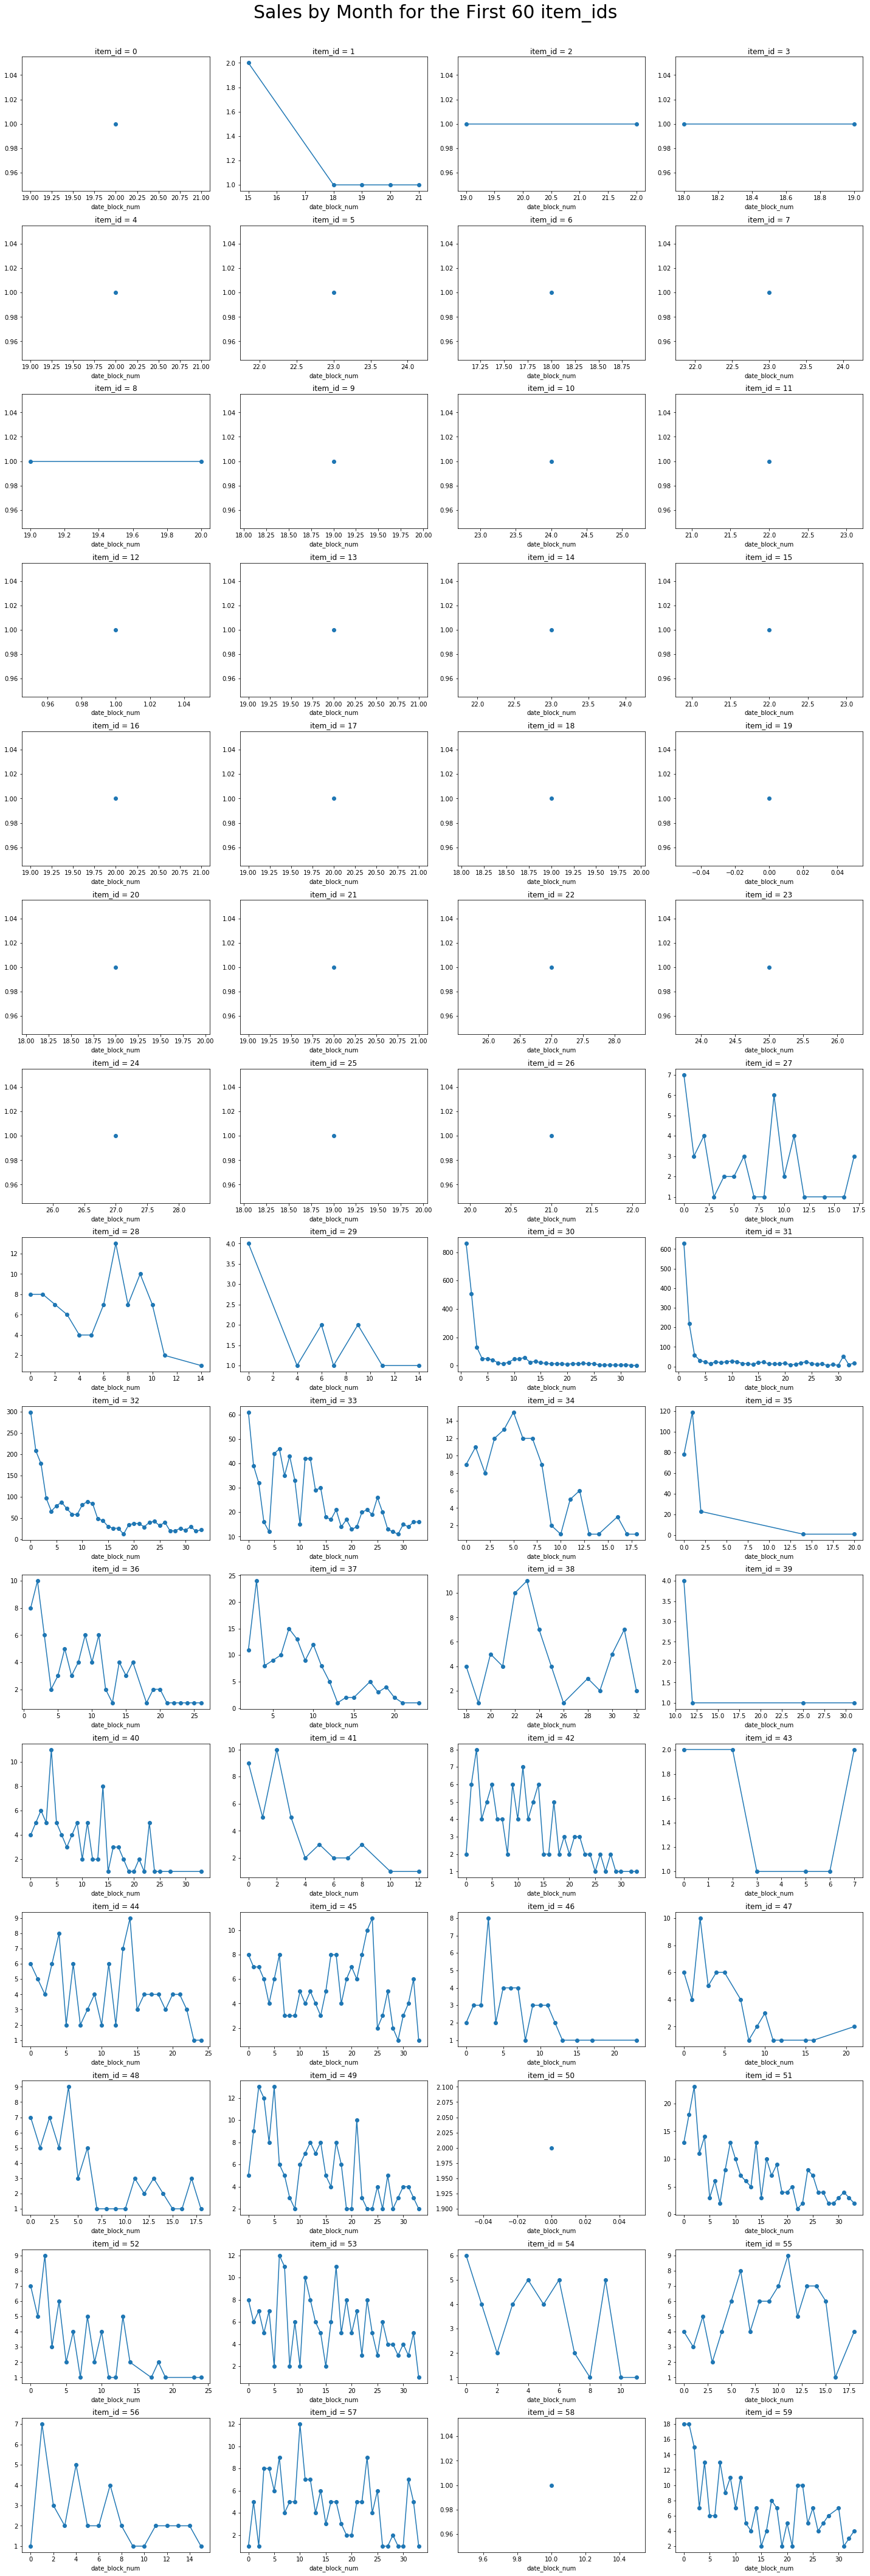

In [96]:
plt.figure(figsize=(20, 60))
for i in range(0, 60):
    plt.subplot(15, 4, i + 1)
    plt.title('item_id = {}'.format(i))
    monthly[monthly['item_id'] == i].groupby('date_block_num')['item_cnt_month'].agg('sum').fillna(0).plot(style=['-o']);
plt.tight_layout()
plt.suptitle('Sales by Month for the First 60 item_ids', size=30)
plt.subplots_adjust(top=0.96)
plt.show()

In [67]:
for i in range(34):
    print(monthly[monthly['date_block_num'] == i]['item_cnt_month'].mean())

2.0795742123244336
2.1371485776257613
2.299920283852009
1.9618214429517917
2.0070924647253077
2.2311374475051604
2.0154389592487294
2.1593705835717487
2.5852060106640815
2.496398512429047
2.5264088612514572
2.7663407568350533
2.192404351087772
2.2993250041925206
2.3391085593718937
2.1581582476531067
2.1367390639339248
2.0961037843419894
1.994929626715622
2.2119554684640064
2.4542463449026544
2.521939194741167
2.5755655119659053
2.846984394770139
2.3724425440940675
2.0342594829669003
2.026838671411625
2.367361216730038
2.243792675356921
2.0092763797047857
1.8846601246756345
1.9733321388042764
2.454444369566682
2.253528273762329


I don't see any trend in the mean number of sales per combination of sold item and store.

In [55]:
monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,mean_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


In [57]:
for i in range(34):
    print(monthly[monthly['date_block_num'] == i]['item_id'].nunique())

8115
8168
8302
8145
8339
8478
8405
8031
7876
8039
8089
8474
7551
7134
7142
6774
6685
6681
6611
6363
6071
6334
6322
6605
6139
6053
6082
5476
5283
5216
5323
5108
5085
5413


In [60]:
for i in range(34):
    print(monthly[monthly['date_block_num'] == i]['shop_id'].nunique())

45
46
46
46
45
46
46
45
45
46
45
46
46
46
48
49
49
49
50
51
50
52
50
50
50
47
46
47
44
43
43
42
43
44


The output of the above two cells suggest that the 42 shops and 5100 items in the test set are probably ones for which there were non-zero sales, because those numbers are consistent with the results for the preceding months. However, how many cases of non-zero sales are there each month?

In [62]:
for i in range(34):
    print(len(monthly[monthly['date_block_num'] == i]))

63224
59935
63977
54638
53296
56196
58035
58022
51575
51090
51460
66276
53320
47704
49291
44740
45766
46481
45756
46439
40423
42595
45755
59275
46775
41390
40464
32875
32220
31909
33527
33486
29678
31531


In [68]:
test['shop_id'].value_counts()

59    5100
16    5100
28    5100
26    5100
25    5100
24    5100
22    5100
21    5100
19    5100
18    5100
15    5100
58    5100
14    5100
12    5100
10    5100
7     5100
6     5100
5     5100
4     5100
3     5100
31    5100
34    5100
35    5100
36    5100
57    5100
56    5100
55    5100
53    5100
52    5100
50    5100
49    5100
48    5100
47    5100
46    5100
45    5100
44    5100
42    5100
41    5100
39    5100
38    5100
37    5100
2     5100
Name: shop_id, dtype: int64

In [63]:
len(test)

214200

In [64]:
32000/214200

0.14939309056956115

Ok, so the test set is not entirely non-zero. I hypothesize that it's every combination of an item_id that was sold and a shop_id that sold an item. The latest months having about 32000 rows while the test set has 214200 rows suggests the estimation that only about 15% of the test set is non-zero. For consistency of training set and test set, the training set should have something like 85% zero-sales rows.

In [65]:
monthly['item_id'].nunique()

21807

In [66]:
monthly['shop_id'].nunique()

60

Ok, so most items have been sold at least once within the entire time range and every shop has sold at least one item.

Let's look at how the prices vary over time.

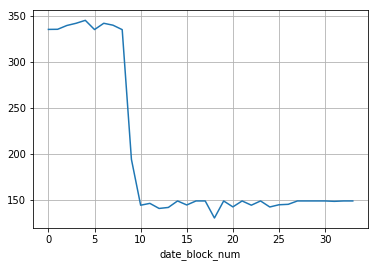

In [70]:
monthly[monthly['item_id'] == 32].groupby('date_block_num')['mean_price'].agg('mean').plot(grid=True);

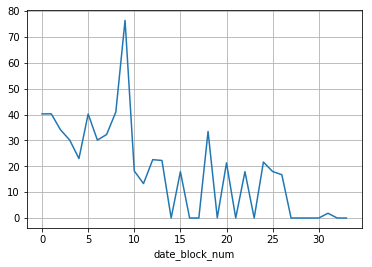

In [74]:
monthly[monthly['item_id'] == 32].groupby('date_block_num')['mean_price'].agg('std').plot(grid=True);

The standard deviation shows that, for item 32, the mean sale price varied a lot from store to store during 2013, but less so during 2014 and barely at all past Feb of 2015.

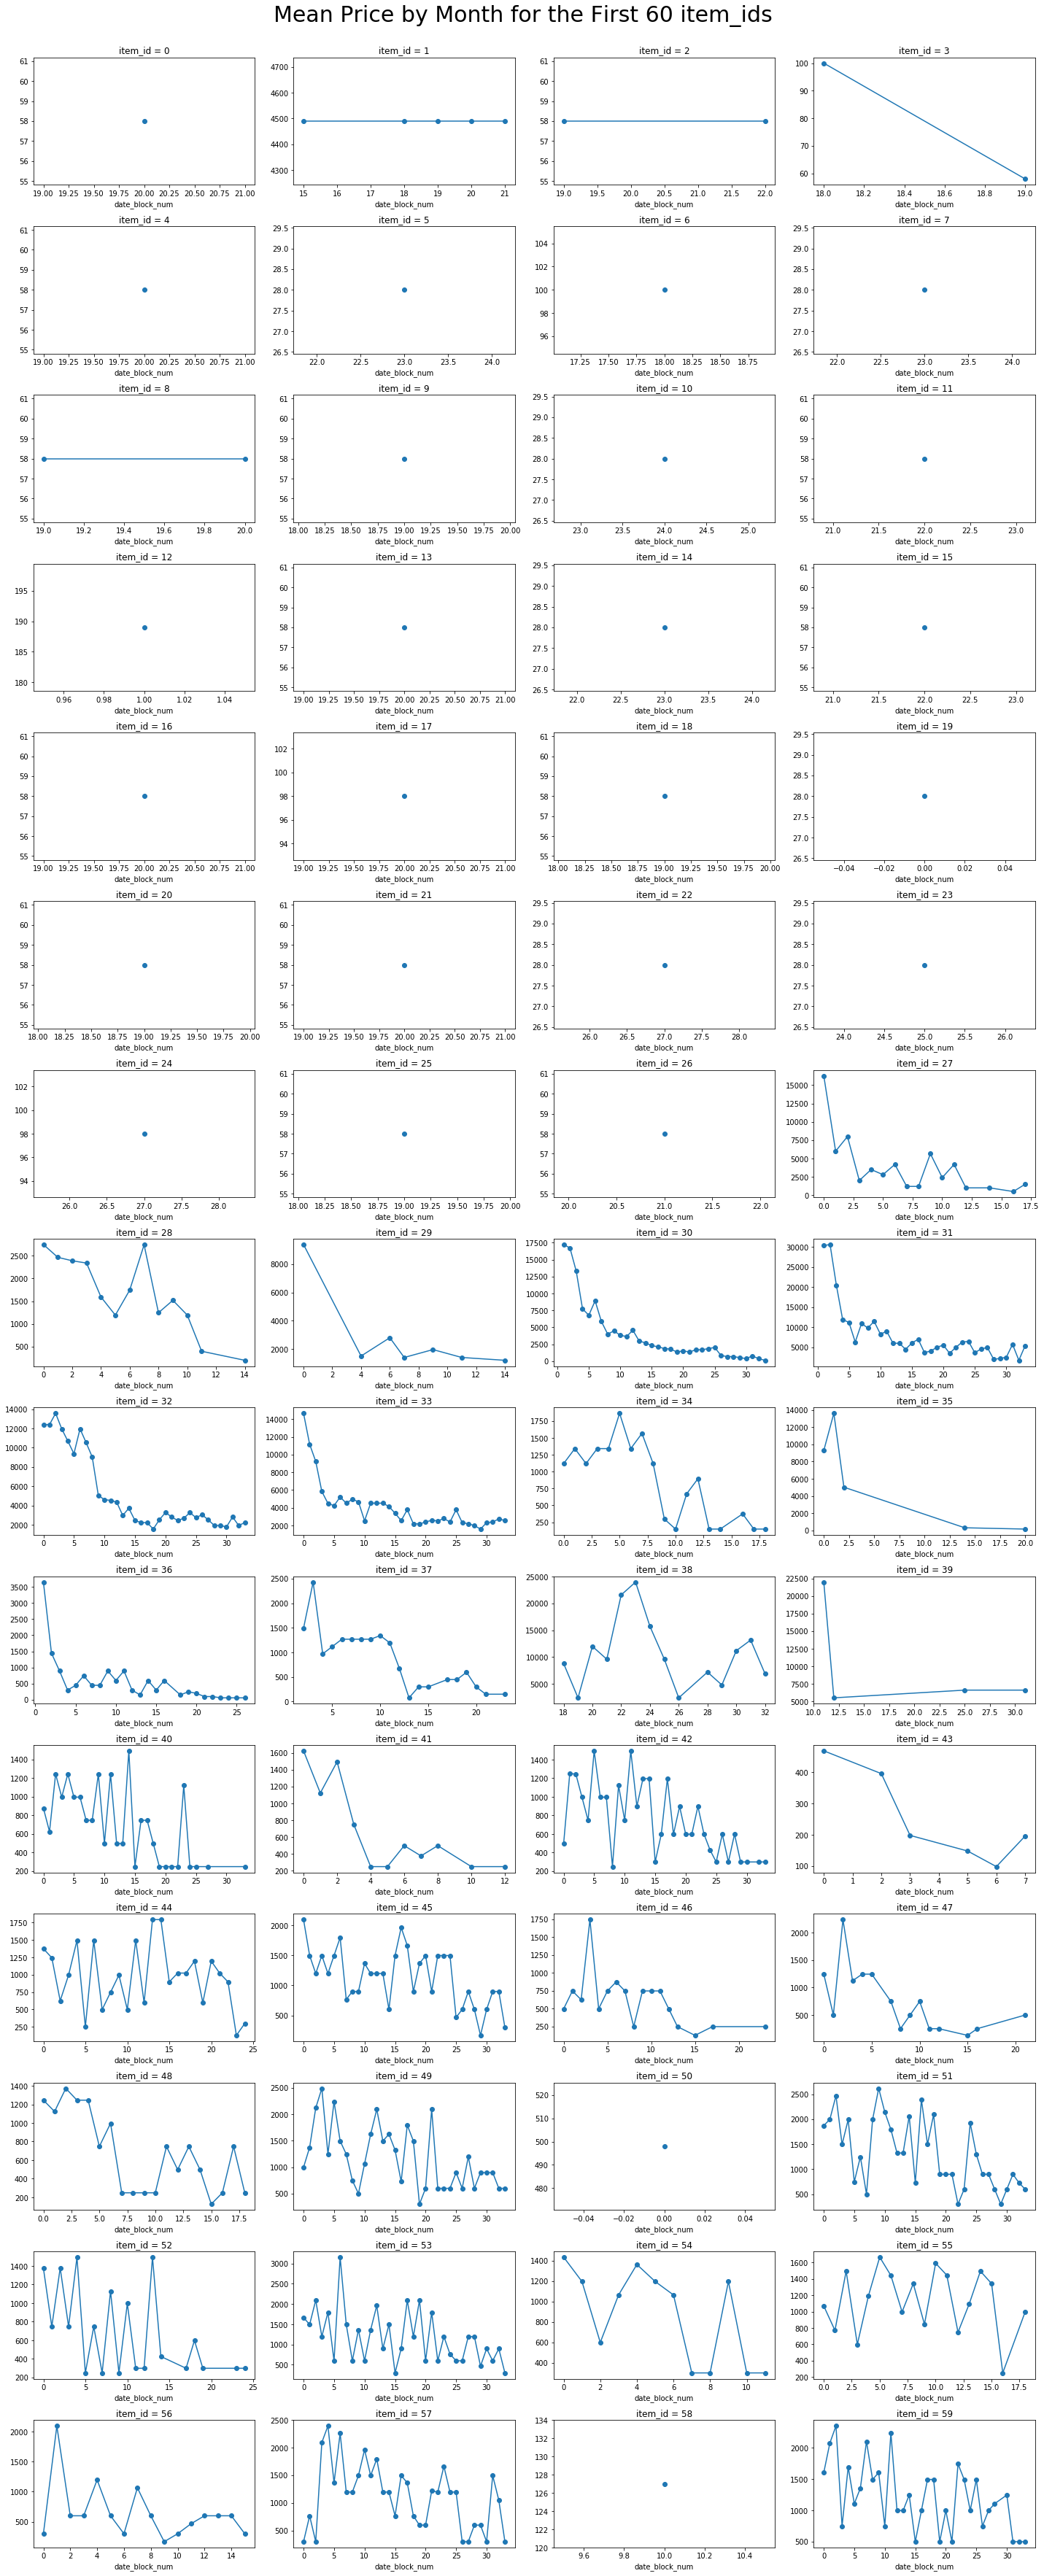

In [89]:
plt.figure(figsize=(20, 50))
for i in range(0, 60):
    plt.subplot(15, 4, i + 1)
    plt.title('item_id = {}'.format(i))
    monthly[monthly['item_id'] == i].groupby('date_block_num')['mean_price'].agg('sum').fillna(0).plot(style=['-o']);
plt.tight_layout()
plt.suptitle('Mean Price by Month for the First 60 item_ids', size=30)
plt.subplots_adjust(top=0.96)
plt.show()

I think it's time to contruct the expanded set of monthly data, including the rows of zero item_cnt_month. I will do this by following the pattern that I hypothesize is in the test set: every combination of item sold in the particular month and shop that sold an item in the particular month.

In [69]:
monthly.head()

,date_block_num,shop_id,item_id,item_cnt_month,mean_price
0,0,0,32,6.0,221.0
1,0,0,33,3.0,347.0
2,0,0,35,1.0,247.0
3,0,0,43,1.0,221.0
4,0,0,51,2.0,128.5


WARNING: THE CODE BELOW TAKES A LONG TIME TO RUN. The last time it was run it took somewhere between 2.6 and 3.6 hours. Therefore I have added a line that prints progress and the total run time at the end of each time through the loop.

In [100]:
month_dfs = []
import time
start = time.time()
for i in range(34):
    df = monthly[monthly['date_block_num'] == i]
    sold_shop_ids = df['shop_id'].unique()
    sold_item_ids = df['item_id'].unique()
    # Make lists for storing the column values to go into our next dataframe
    date_block_num_col = []
    shop_id_col = []
    item_id_col = []
    item_cnt_month_col = []
    for shop_id in sold_shop_ids:
        for item_id in sold_item_ids:
            date_block_num_col.append(i)
            shop_id_col.append(shop_id)
            item_id_col.append(item_id)
            # The value to append to item_cnt_month_col is more complicated:
            combo = df[(df['shop_id'] == shop_id) & (df['item_id'] == item_id)]
            if len(combo) > 0:
                # This month has a row for this combination of shop_id and item_id, so use that number
                item_cnt_month_col.append(combo['item_cnt_month'].values[0])
            else:
                # This month has no such row, so append 0 instead
                item_cnt_month_col.append(0)
    month_dfs.append(pd.DataFrame({'date_block_num': date_block_num_col, 'shop_id': shop_id_col,
                                   'item_id': item_id_col, 'item_cnt_month': item_cnt_month_col},
                                  columns=['date_block_num', 'shop_id', 'item_id', 'item_cnt_month']))
    print('date_block_num = {} processed. Run time: {} minutes.'.format(i, round((time.time() - start) / 60)))
len(month_dfs)

34

In [107]:
month_dfs[0]

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
5,0,0,61,1.0
6,0,0,75,1.0
7,0,0,88,1.0
8,0,0,95,1.0
9,0,0,96,1.0


In [108]:
monthly_xtra = pd.concat(month_dfs, ignore_index=True)
len(monthly_xtra)

10913850

By adding these rows with 0 sales, we've gone from ~1.6 million rows to ~10.9 million rows. Let's see how much memory this is occupying.

In [109]:
monthly_xtra.memory_usage(deep=True)

Index                   80
date_block_num    87310800
shop_id           87310800
item_id           87310800
item_cnt_month    87310800
dtype: int64

In [112]:
print('Total memory usage: {}MB'.format(round(monthly_xtra.memory_usage(deep=True).sum() / 1024**2)))

Total memory usage: 333.0MB
